<a href="https://colab.research.google.com/github/BarbosaRicardo/Assignment-1/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing data and looking into it

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/BarbosaRicardo/iot-lab1/main/heart.csv")    


### Verify pandas object is a dataframe

In [5]:
type(df)

pandas.core.frame.DataFrame

### Shape of dataset

In [6]:
df.shape

(303, 14)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


### Investigate the top 10 columns

In [8]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Column Representations

In [9]:
col_desc = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(col_desc)):
    print(df.columns[i]+":\t\t"+col_desc[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


## Dataset Description

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### "TARGET" Variable Description

In [11]:
df["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
df["target"].unique() # Classification. Since target contains values 0 and 1

array([1, 0])

## Check correlations

In [13]:
print(df.corr()["target"].abs())

age         0.225439
sex         0.280937
cp          0.433798
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg     0.137230
thalach     0.421741
exang       0.436757
oldpeak     0.430696
slope       0.345877
ca          0.391724
thal        0.344029
target      1.000000
Name: target, dtype: float64


We notice from the correlation that almost all of the columns do correlate with one another. There is only one anomally that is contained in the columns. We see that the 'fbs' does not have a very strong correlation - with cholesterol being the next column with the least amount of possible relationship to the target. 

# 3. Exploratory Data Analysis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Percent of female population with heart conditions: 45.54
Percent of male population with heart conditions: 54.46


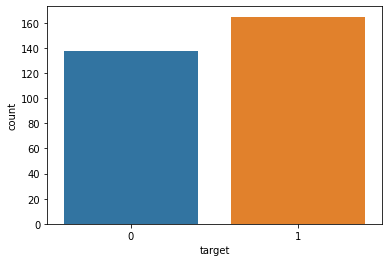

In [14]:
y = df["target"]
sns.countplot(y)
tars = df.target.value_counts()
print("Percent of female population with heart conditions: " + str(round(tars[0]*100/303,2)))
print("Percent of male population with heart conditions: " + str(round(tars[1]*100/303,2)))


In [15]:
df["sex"].unique()

array([1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


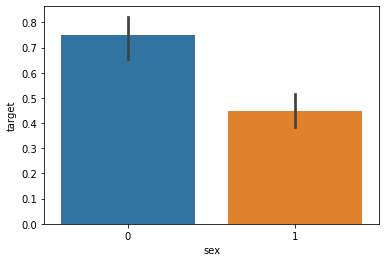

In [16]:
sns.barplot(df["sex"],y)

In this context, it appears that males are less likely to have heart problems than females.

## Chest Pain Analyses

In [17]:
df["cp"].unique()

array([3, 2, 1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


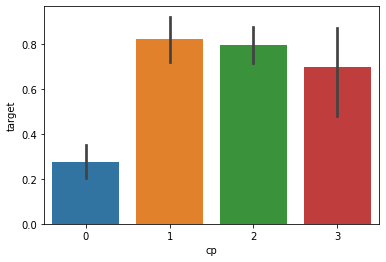

In [18]:
sns.barplot(df["cp"],y)

Here we see the 4 types of chest pain. Angina related chest pains are less likely to be a cause of heart disease. 

## Fasting Blood Sugar Analyses

In [19]:
df["fbs"].unique()

array([1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


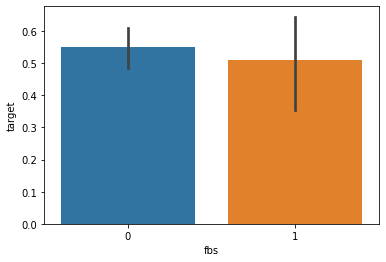

In [20]:
sns.barplot(df["fbs"],y)

There appears to be a neutral response in fasting blood sugar levels as it is related to heart conditions.

## Analysing the heart at rest EKG

In [21]:
df["restecg"].unique()

array([0, 1, 2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


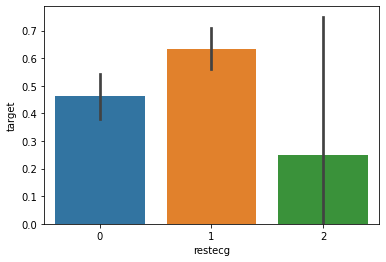

In [22]:
sns.barplot(df["restecg"],y)

It appears that those who have restful EKG's in "2" have a least chance in having heart problems 

## Exercise Induced Angina 

In [23]:
df["exang"].unique()

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


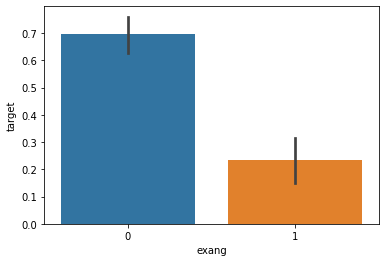

In [24]:
sns.barplot(df["exang"],y)

Patients with exercise induced angina are less likely to have heart problems than those who have chest pains that are not exercised induced related to Angina.

## Slope Feature Analyses

In [25]:
df["slope"].unique()

array([0, 2, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


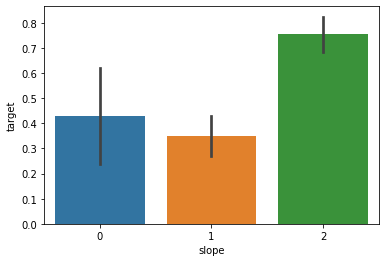

In [26]:
sns.barplot(df["slope"],y)

From the graphs one can see that having slope '2' will incur more heart problems than 0 or 1

## Major Vessels Analyses

In [27]:
df["ca"].unique()

array([0, 2, 1, 3, 4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


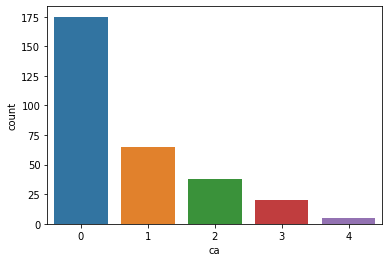

In [28]:
sns.countplot(df["ca"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


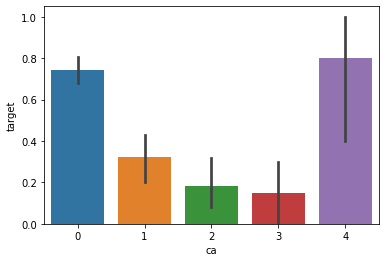

In [29]:
sns.barplot(df["ca"],y)

There are an extra number of heart conditions with those who are labeled as ca = 4

# 4. Train Test Split using sklearn

In [30]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target", axis = 1)
target = df["target"]

X_train,X_test,Y_train,Y_test= train_test_split(predictors, target,test_size=0.20,random_state=0)

In [31]:
X_train.shape

(242, 13)

In [32]:
X_test.shape

(61, 13)

In [33]:
Y_train.shape

(242,)

In [34]:
Y_test.shape

(61,)

# 5. Fitting the Model

In [35]:
from sklearn.metrics import accuracy_score

## Logistic Regression

In [36]:
import sklearn.linear_model as lm

lr = lm.LogisticRegression(max_iter=3000)
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [37]:
Y_pred_lr.shape

(61,)

In [38]:
score_lr= round(accuracy_score(Y_pred_lr, Y_test)*100,2)
print("Linear Regression accuracy score: " + str(score_lr)+"%")

Linear Regression accuracy score: 85.25%


## KNN Clustering

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [40]:
Y_pred_knn.shape

(61,)

In [41]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("KNN accuracy score: " + str(score_knn)+"%")

KNN accuracy score: 67.21%


## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [43]:
print(Y_pred_dt.shape)

(61,)


In [44]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("Decision Tree accuracy score: "+str(score_dt)+"%")

Decision Tree accuracy score: 81.97%


## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [46]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("Decision Tree accuracy score: "+str(score_rf)+" %")

Decision Tree accuracy score: 90.16 %


## 6. Final Score Summary

In [47]:
scores = [score_lr,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


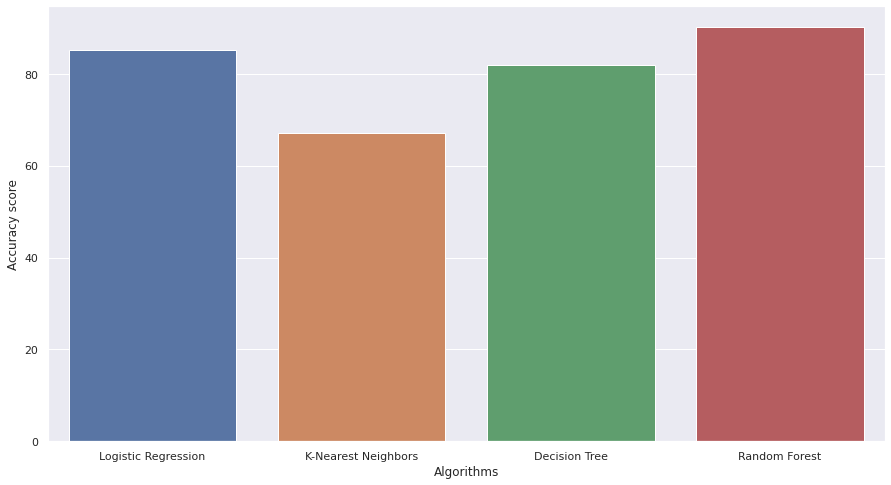

In [48]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)
plt.show()